# Face generation with DCGAN

В этом ноутбуке будем использовать уже обученную нейронную сеть для генерации лиц размера 128x128.

In [ ]:
!git init .
!git remote add -f origin "https://github.com/Sankek/DCGAN_FaceGeneration"
!git pull origin master

In [9]:
import matplotlib.pyplot as plt

import torch

from models import load_final_state
from utils import random_noise_vectors, tensor2image

In [10]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Current device: {DEVICE}")

Current device: cpu


## Загрузка модели

In [11]:
latent_size = 100  # Размер вектора шума, из которого генерируется изображение
dataset_mean, dataset_std = [0.5]*3, [0.5]*3  # Нормировка, используемая при обучении 
models, optimizers, (d_losses_real, d_losses_fake, g_losses) = load_final_state(device=DEVICE)
generator = models['generator'].to(DEVICE)

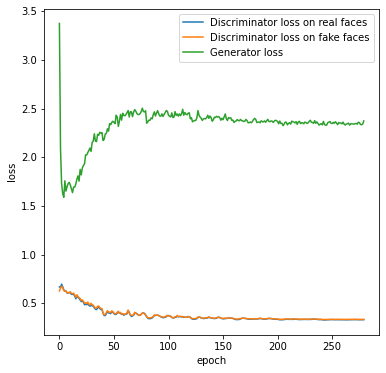

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(d_losses_real, label="Discriminator loss on real faces")
ax.plot(d_losses_fake, label="Discriminator loss on fake faces")
ax.plot(g_losses, label="Generator loss")
ax.legend()
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
plt.show()

## Генерация изображений

In [31]:
images_num = 16
noise_vectors = random_noise_vectors(images_num, latent_size, device=DEVICE)

In [32]:
with torch.no_grad():
    generated_images = [tensor2image(genim, dataset_mean, dataset_std) for genim in generator(noise_vectors)]

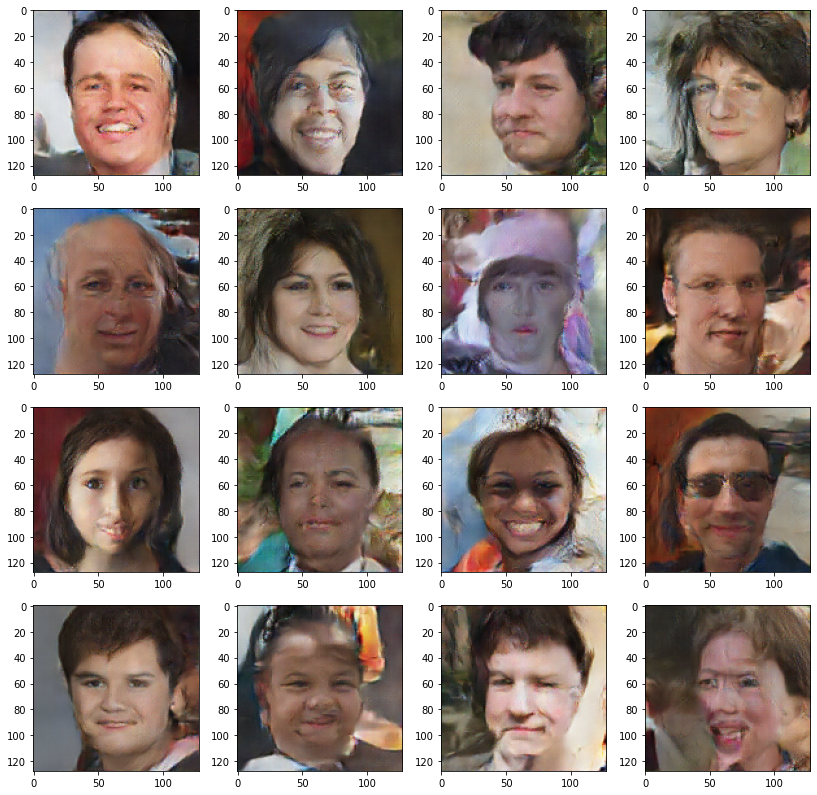

In [33]:
rows_num = 4
cols_num = 4
fig, axs = plt.subplots(rows_num, cols_num, figsize=(14, 14), squeeze=False)
for i in range(images_num):
    axs[i//rows_num, i%cols_num].imshow(generated_images[i])
plt.show()